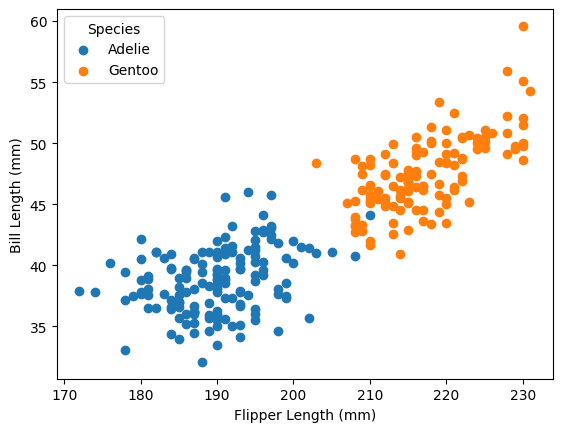

In [1]:
import matplotlib.pyplot as plt
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sns

# Load the CSV file
df = pd.read_csv("penguins.csv")

# Scatter plot
plt.figure()
for species, group in df.groupby("species"):
    plt.scatter(
        group["flipper_length_mm"],
        group["bill_length_mm"],
        label=species
    )

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Bill Length (mm)")
plt.legend(title="Species")
plt.show()



In [2]:
#check for empty
print(df[['flipper_length_mm', 'bill_length_mm']].isna().sum())

# Drop rows with NaNs in the features
df_clean = df.dropna(subset=['flipper_length_mm', 'bill_length_mm'])

# Prepare SVM (binary classification: Adelie vs non-Adelie)
attributes = df_clean[['flipper_length_mm','bill_length_mm']].values
type_label = np.where(df_clean['species']=='Adelie', 0, 1)

model = svm.SVC(kernel='linear') #could add C paramter here (default value 1)
model.fit(attributes, type_label)


flipper_length_mm    2
bill_length_mm       2
dtype: int64


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


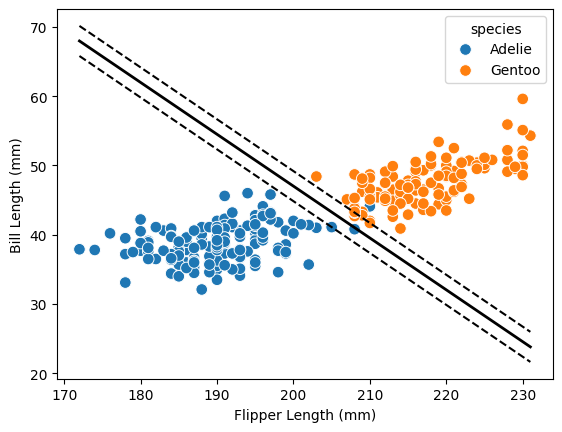

In [3]:
# Hyperplane
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(df_clean['flipper_length_mm'].min(), df_clean['flipper_length_mm'].max())
yy = a * xx - (model.intercept_[0]) / w[1]

# Support vectors
b1 = model.support_vectors_[0]
yy_down = a * xx + (b1[1] - a * b1[0])

b2 = model.support_vectors_[-1]
yy_up = a * xx + (b2[1] - a * b2[0])

# Plot using seaborn
sns.scatterplot(
    x='flipper_length_mm',
    y='bill_length_mm',
    data=df_clean,
    hue='species',
    s=70
)

plt.plot(xx, yy, linewidth=2, color='black')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Bill Length (mm)")
plt.show()



You're looking at a Adelie penguin!


C:\Users\ljhof\AppData\Local\Temp\ipykernel_3664\975771331.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Type'] = type_label


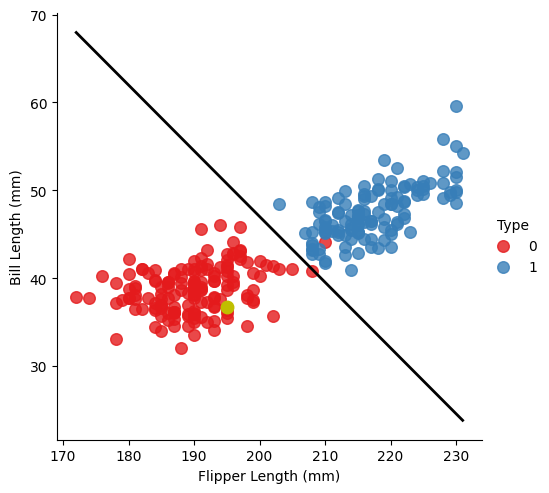

In [4]:
#----------------------------------------------------------------------------------------------------#
#prediction function
def Adelie_or_Gentoo(bill_length_mm, flipper_length_mm):
    if(model.predict([[flipper_length_mm, bill_length_mm]]))==0:
        print('You\'re looking at a Adelie penguin!')
    else:
        print('You\'re looking at a Gentoo penguin!')

#predict if adelie or gentoo
Adelie_or_Gentoo(36.7, 195)
# Add SVM labels into the DataFrame
df_clean['Type'] = type_label

# Plot the data using seaborn
sns.lmplot(
    x='flipper_length_mm',
    y='bill_length_mm',
    data=df_clean,
    hue='Type',
    palette='Set1',
    fit_reg=False,
    scatter_kws={"s": 70}
)

# Plot SVM decision boundary
plt.plot(xx, yy, linewidth=2, color='black')

# Plot point (36.7, 195)
plt.plot(195, 36.7, 'yo', markersize=9)

plt.xlabel("Flipper Length (mm)")
plt.ylabel("Bill Length (mm)")
plt.show()




In [5]:
Adelie_or_Gentoo(54.5, 212)

You're looking at a Gentoo penguin!
